In [536]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [537]:
#Q1. Load the dataset into python environment

In [538]:
data=pd.read_csv(r'D:\ICT\Assignments\Assignment 5\dataset\titanic_dataset.csv')

In [539]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [540]:
data.shape

(891, 12)

In [541]:
#Q2. Make‘PassengerId’ as the index column
data.set_index('PassengerId',inplace=True)


In [542]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [543]:
data.shape

(891, 11)

In [544]:
#Q3. Check the basic details of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [545]:
#Q4. Fill in all the missing values present in all the columns in the dataset
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [546]:
data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [547]:
data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [548]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [549]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [550]:
data['Age'].mean()

29.69911764705882

In [551]:
data['Age'].median()

28.0

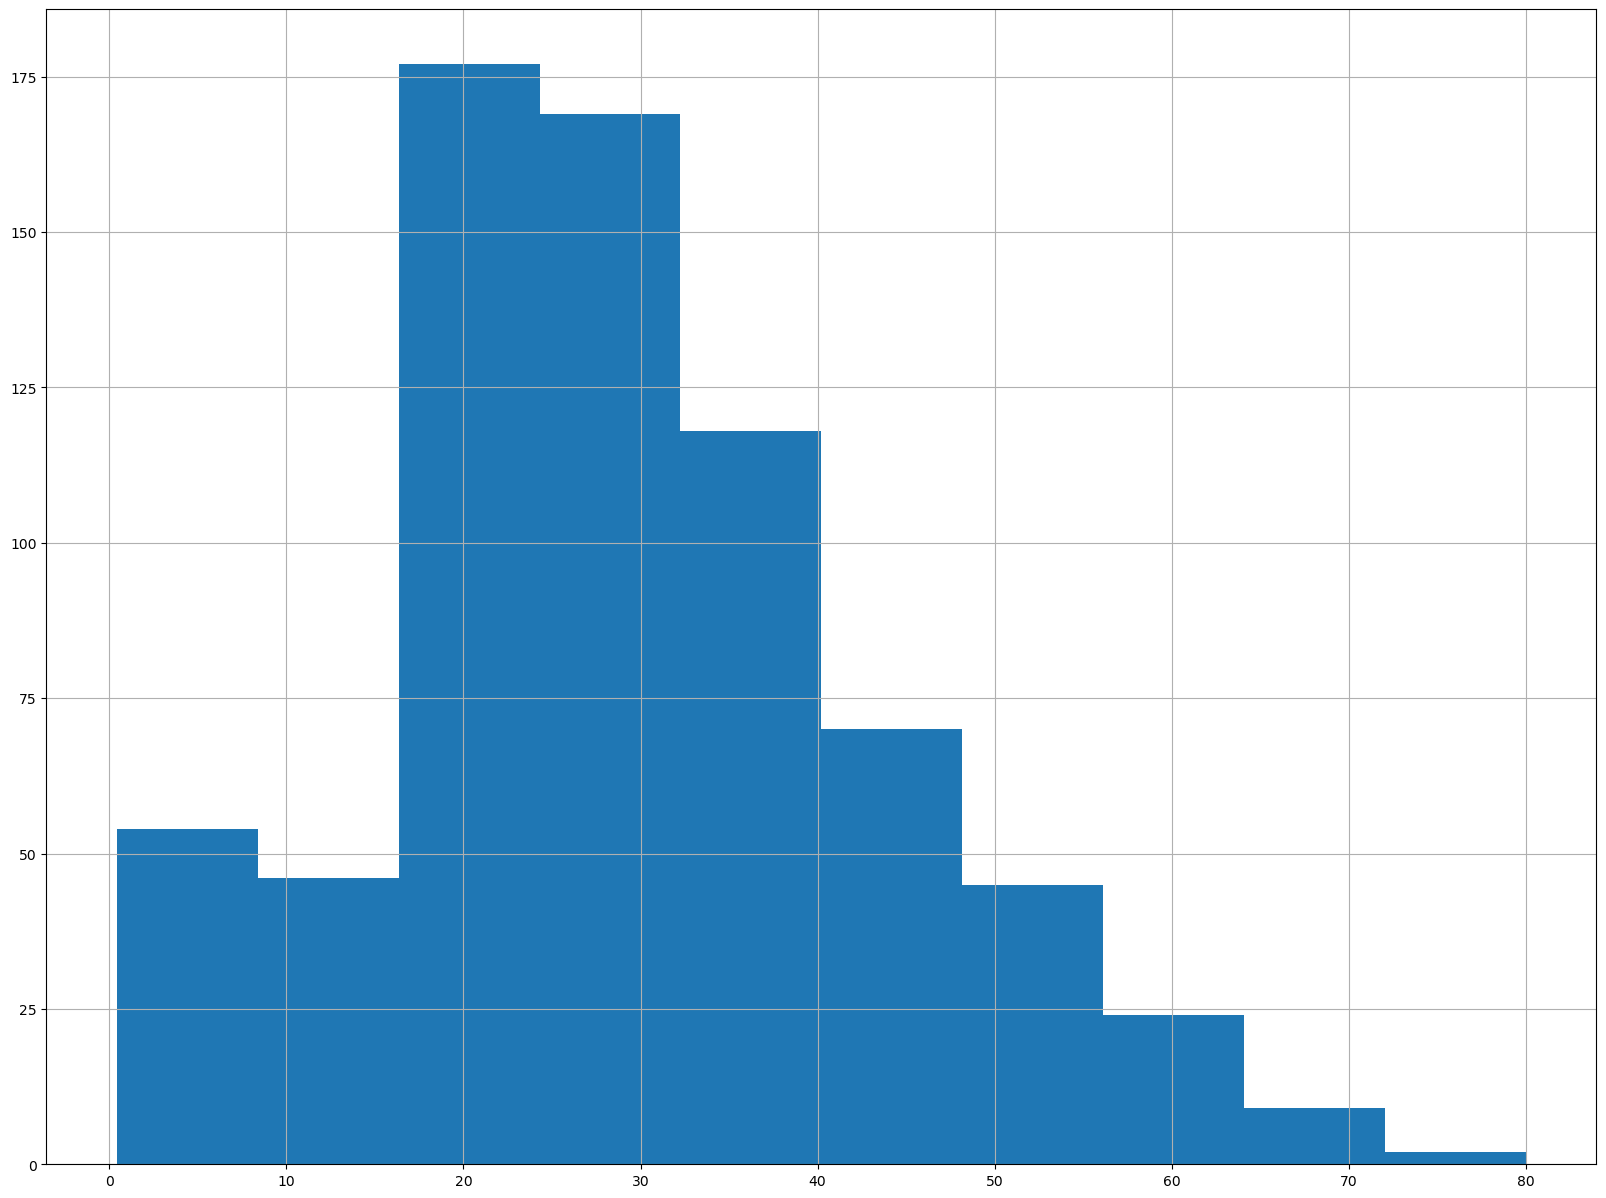

In [552]:
data['Age'].hist(figsize=[20,15])
plt.show()

In [553]:
#Skewed data so using median to fill missing values

In [554]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [555]:
data['Cabin']=data['Cabin'].fillna('G6')

In [556]:
data['Embarked']=data['Embarked'].fillna('S')

In [557]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [558]:
#Q5. Check and handle outliers in at least 3 columns in the dataset

In [559]:
data1=data.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [560]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


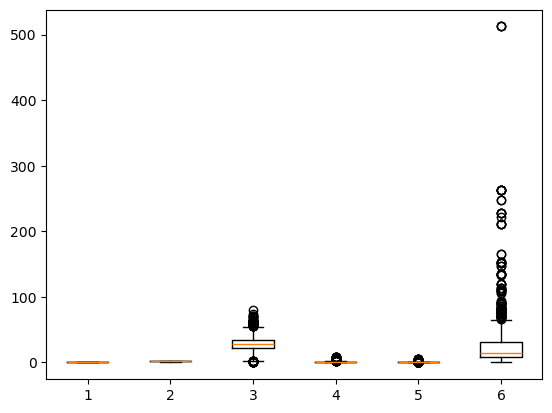

In [561]:
plt.boxplot(data1)
plt.show()

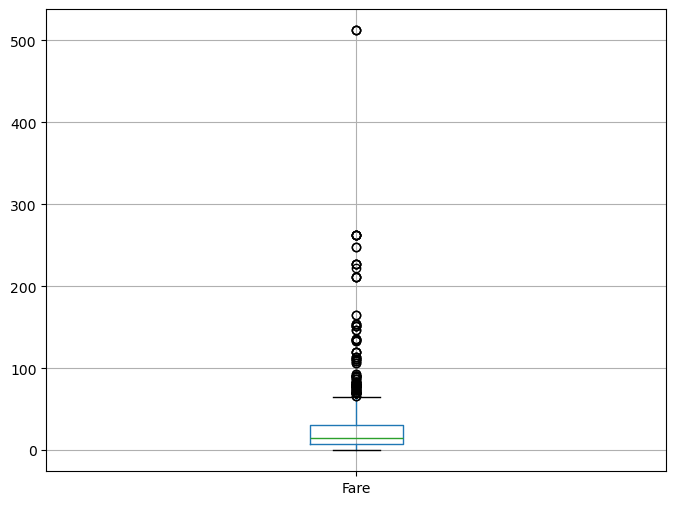

In [562]:
data1.boxplot(column='Fare',figsize=(8,6))
plt.show()

In [563]:
Q1=np.percentile(data1['Fare'],25)
Q1

7.9104

In [564]:
Q3=np.percentile(data1['Fare'],75)
Q3

31.0

In [565]:
IQR=Q3-Q1
IQR

23.0896

In [566]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [567]:
lower_limit

-26.724

In [568]:
upper_limit

65.6344

In [569]:
upper_array=np.where(data1['Fare']>=upper_limit)[0]
lower_array=np.where(data1['Fare']<=lower_limit)[0]

In [570]:
upper_array

array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
       139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
       258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
       311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
       375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
       496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
       585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
       689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
       779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
      dtype=int64)

In [571]:
lower_array

array([], dtype=int64)

In [572]:
data1.drop(index=upper_array,inplace=True)


In [573]:
data1.drop(index=lower_array,inplace=True)

In [574]:
data1.shape

(775, 6)

In [575]:
data1

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,28.0,0,0,8.4583
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,28.0,1,2,23.4500


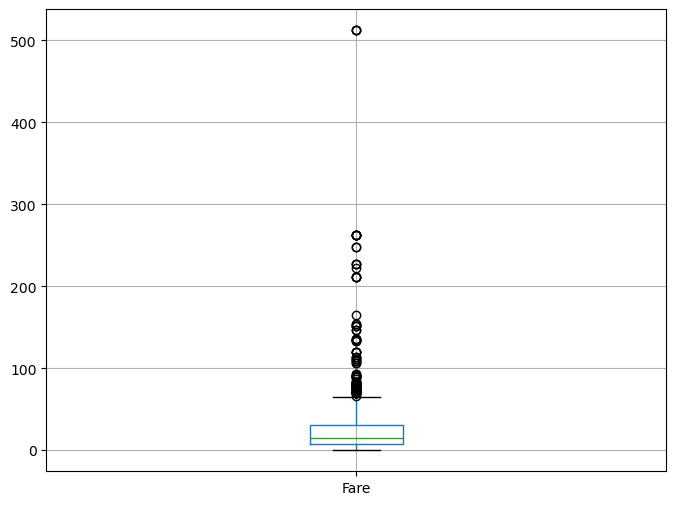

In [576]:
data1.boxplot(column='Fare',figsize=(8,6))
plt.show()

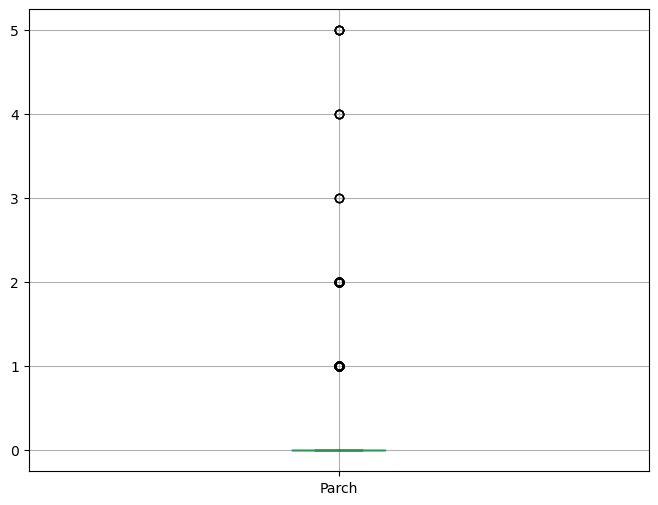

In [577]:
data1.boxplot(column='Parch',figsize=(8,6))
plt.show()

In [578]:
Q1=np.percentile(data1['Parch'],25)
Q1

0.0

In [579]:
Q3=np.percentile(data1['Parch'],75)
Q3

0.0

In [580]:
IQR=Q3-Q1
IQR

0.0

In [581]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [582]:
lower_limit

0.0

In [583]:
upper_limit

0.0

In [584]:
upper_array=np.where(data1['Parch']>=upper_limit)[0]
lower_array=np.where(data1['Parch']<=lower_limit)[0]

In [585]:
upper_array

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [586]:
lower_array

array([  0,   1,   2,   3,   4,   5,   8,  10,  11,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  40,  41,  42,  43,  44,  45,  47,  48,
        50,  51,  52,  55,  57,  59,  60,  62,  63,  64,  65,  66,  67,
        68,  69,  71,  72,  73,  74,  75,  76,  77,  80,  81,  82,  83,
        85,  86,  87,  90,  91,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 108, 109, 110, 112, 113, 114, 116,
       117, 118, 119, 120, 121, 122, 124, 125, 127, 128, 129, 130, 132,
       135, 136, 137, 139, 141, 142, 145, 146, 147, 152, 153, 154, 157,
       158, 161, 162, 164, 168, 169, 170, 172, 173, 174, 175, 177, 178,
       180, 181, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222,
       225, 226, 228, 229, 231, 233, 235, 236, 237, 239, 240, 24

In [587]:
data1.drop(index=upper_array,inplace=True)
data1.drop(index=lower_array,inplace=True)

KeyError: '[0, 1, 27, 31, 34, 52, 61, 62, 72, 88, 102, 118, 120, 124, 139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310, 311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373, 375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581, 585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765] not found in axis'

In [ ]:
#Since both upper and lower limts are zero everything is considered as outlier

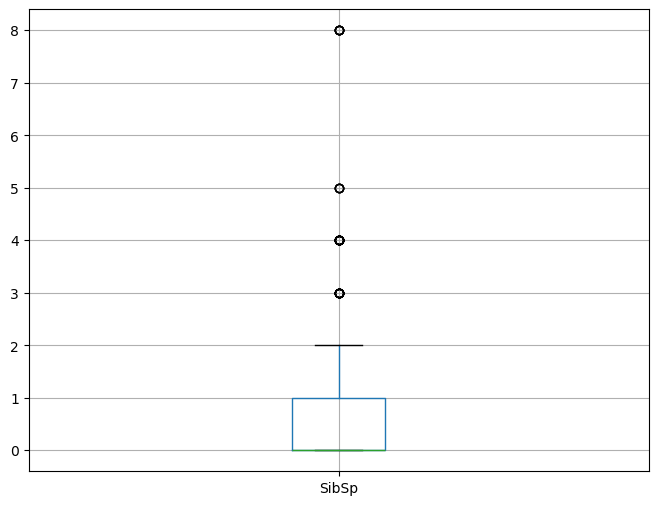

In [588]:
data1.boxplot(column='SibSp',figsize=(8,6))
plt.show()

In [590]:
Q1=np.percentile(data1['SibSp'],25)
Q1

0.0

In [592]:
Q3=np.percentile(data1['SibSp'],75)
Q3

1.0

In [594]:
IQR=Q3-Q1
IQR

1.0

In [596]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [598]:
lower_limit

-1.5

In [600]:
upper_limit

2.5

In [602]:
upper_array=np.where(data1['SibSp']>=upper_limit)[0]
lower_array=np.where(data1['SibSp']<=lower_limit)[0]

In [604]:
upper_array

array([  6,  15,  23,  25,  46,  54,  56,  61,  77,  79, 143, 148, 155,
       160, 163, 165, 182, 210, 238, 247, 292, 330, 351, 417, 468, 469,
       551, 558, 592, 595, 630, 682, 685, 705, 715, 734, 737, 748],
      dtype=int64)

In [606]:
lower_array

array([], dtype=int64)

In [608]:
upper_array1=np.array([  6,  15,  23,  25,  46,  54,  56,77,  79, 143, 148, 155,
       160, 163, 165, 182, 210, 238, 247, 292, 330, 351, 417, 468, 469,
       551,592, 595, 630, 682, 685, 705, 715, 734,748])

In [610]:
data1.drop(index=upper_array1,inplace=True)
data1.drop(index=lower_array,inplace=True)

In [612]:
data1.shape

(740, 6)

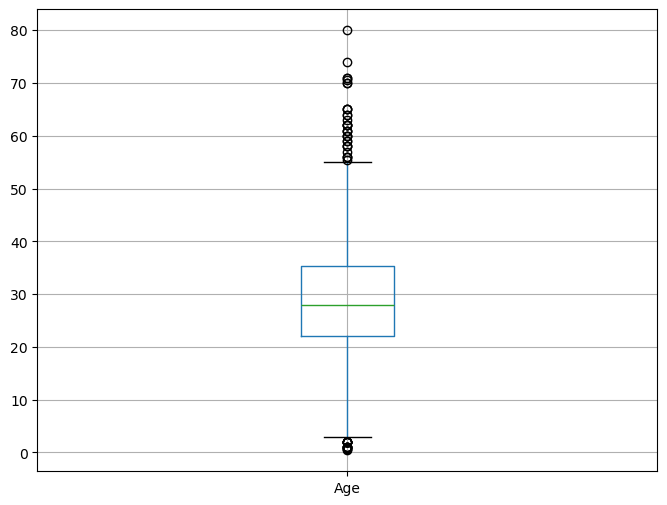

In [614]:
data1.boxplot(column='Age',figsize=(8,6))
plt.show()

In [616]:
Q1=np.percentile(data1['Age'],25)
Q1

22.0

In [618]:
Q3=np.percentile(data1['Age'],75)
Q3

35.25

In [620]:
IQR=Q3-Q1
IQR

13.25

In [622]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [624]:
lower_limit

2.125

In [626]:
upper_limit

55.125

In [628]:
upper_array=np.where(data1['Age']>=upper_limit)[0]
lower_array=np.where(data1['Age']<=lower_limit)[0]

In [630]:
upper_array

array([  9,  43,  76,  78,  97, 126, 139, 143, 161, 192, 209, 225, 230,
       262, 294, 354, 370, 397, 403, 446, 454, 467, 481, 515, 518, 533,
       554, 571, 610, 633, 684, 703, 728], dtype=int64)

In [632]:
lower_array

array([  5,  13, 141, 150, 170, 243, 304, 308, 381, 391, 434, 529, 619,
       660, 680, 683, 686], dtype=int64)

In [634]:
data1.drop(index=upper_array1,inplace=True)
data1.drop(index=lower_array,inplace=True)

KeyError: '[6, 15, 23, 25, 46, 54, 56, 77, 79, 143, 148, 155, 160, 163, 165, 182, 210, 238, 247, 292, 330, 351, 417, 468, 469, 551, 592, 595, 630, 682, 685, 705, 715, 734, 748] not found in axis'

In [636]:
data1.shape

(740, 6)

In [ ]:
#Q6. Do minmaxscaling on the feature set (Take ‘Survived’ as target)

In [638]:
data1.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [640]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
7,0,1,54.0,0,0,51.8625


In [642]:
x=data1.drop('Survived',axis=1)

In [644]:
y=data1['Survived']

In [646]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [648]:
type(x)

numpy.ndarray

In [650]:
x=pd.DataFrame(x)

In [652]:
type(x)

pandas.core.frame.DataFrame

In [654]:
x.describe()

,0,1,2,3,4
count,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.652027,0.366814,0.063851,0.074865,0.064208
std,0.418850,0.163196,0.133023,0.158701,0.101948
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015469
50%,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,0.437673,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000
